<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [85]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('data/job_listings.csv')
df

##### Your Code Here #####

                


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


In [86]:
cleaned_description = []
for row in df['description']:
    soup = BeautifulSoup(row, 'html.parser')
    new = soup.get_text()
    cleaned_description.append(new)
    

In [87]:
df['description'] = pd.Series(cleaned_description)


In [88]:
def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df
df = remove_unicode(df)
df["description"] = df["description"].str[1:]
df.head()

,Unnamed: 0,description,title
0,0,"""Job Requirements: Conceptual understanding in...",Data scientist
1,1,"'Job Description As a Data Scientist 1, you w...",Data Scientist I
2,2,'As a Data Scientist you will be working on co...,Data Scientist - Entry Level
3,3,"'$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist
4,4,'Location: USA multiple locations + years ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [11]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements: Conceptual understanding i...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description As a Data Scientist 1, you ...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA multiple locations + years...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [12]:
df


,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."
...,...,...,...,...
421,421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer,"[b""About, Us:\nWant, to, be, part, of, a, fant..."
422,422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...,"[b'InternshipAt, Uber,, we, ignite, opportunit..."
423,423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance,"[b'$200,000, -, $350,000, a, yearA, million, p..."
424,424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist,"[b""SENIOR, DATA, SCIENTIST\nJOB, DESCRIPTION\n..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

vect = CountVectorizer(tokenizer=tokenize,
                       ngram_range = (1,2),
                      max_df = .95,
                      min_df = .05)
vect.fit(df['description'])
dtm = vect.transform(df['description'])

C:\Users\movem\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [30]:
print(dtm)


  (0, 6)	1
  (0, 14)	1
  (0, 150)	1
  (0, 160)	1
  (0, 178)	1
  (0, 193)	1
  (0, 194)	1
  (0, 263)	1
  (0, 265)	1
  (0, 270)	1
  (0, 332)	1
  (0, 366)	1
  (0, 384)	2
  (0, 393)	1
  (0, 414)	1
  (0, 421)	1
  (0, 428)	1
  (0, 458)	1
  (0, 459)	1
  (0, 473)	1
  (0, 557)	1
  (0, 559)	1
  (0, 563)	1
  (0, 567)	2
  (0, 577)	1
  :	:
  (425, 937)	1
  (425, 944)	1
  (425, 945)	1
  (425, 950)	1
  (425, 954)	1
  (425, 961)	3
  (425, 962)	2
  (425, 974)	1
  (425, 975)	1
  (425, 977)	1
  (425, 984)	2
  (425, 988)	1
  (425, 993)	1
  (425, 995)	1
  (425, 999)	1
  (425, 1000)	1
  (425, 1001)	1
  (425, 1002)	1
  (425, 1012)	1
  (425, 1018)	1
  (425, 1019)	1
  (425, 1038)	7
  (425, 1040)	1
  (425, 1047)	1
  (425, 1055)	2


In [31]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm


,$,+,+ year,1,10,100,2,2019,3,3 year,...,write communication,write verbal,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\xe2\x80\x99ll
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,2,2,1,0,0,0,0,0,0,...,0,0,4,2,0,0,0,0,1,1
422,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
423,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [58]:
 counts = dtm.sum(axis = 0, skipna = True) 

In [59]:
type(counts)
wc_top20 = counts.sort_values(ascending=False).head(20)
wc_top20

work           1369
data           1270
team           1199
business       1171
experience     1123
science         924
product         820
model           747
analytic        705
analysis        697
machine         693
scientist       660
learning        599
statistical     565
build           553
help            534
opportunity     532
new             529
customer        517
drive           516
dtype: int64

In [60]:
wc_top20 = pd.DataFrame({'word':wc_top20.index, 'count':wc_top20.values})
wc_top20

,word,count
0,work,1369
1,data,1270
2,team,1199
3,business,1171
4,experience,1123
5,science,924
6,product,820
7,model,747
8,analytic,705
9,analysis,697


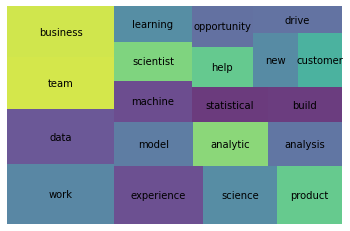

In [63]:
import squarify
import matplotlib.pyplot as plt

#wc_top20 = counts.sort_values(ascending=False).head(20)

squarify.plot(sizes=wc_top20['count'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', 
                        tokenizer=tokenize, 
                        min_df=.05,
                        max_df=.95,
                        max_features=5000,
                        ngram_range=(1,2)
                       )
dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm

,,benefit,build,data,develop,experience,job,look,minimum,need,...,write,write communication,write verbal,year,year,year experience,year professional,year relevant,year work,york
0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.082536,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.00000,0.0,0.0,0.053437,0.0,0.0,0.0,0.049942,0.0,0.000000,...,0.034193,0.0,0.0,0.022996,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.034566,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.114224,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.00000,0.0,0.0,0.044273,0.0,0.0,0.0,0.000000,0.0,0.053751,...,0.000000,0.0,0.0,0.095263,0.048247,0.064552,0.0,0.0,0.0,0.054821
422,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.061734,0.0,0.000000,...,0.042267,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
423,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.043783,0.0,0.0,0.029446,0.000000,0.000000,0.0,0.0,0.0,0.000000
424,0.04516,0.0,0.0,0.000000,0.0,0.0,0.0,0.048408,0.0,0.000000,...,0.000000,0.0,0.0,0.022290,0.000000,0.037760,0.0,0.0,0.0,0.000000


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [90]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [91]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.23171243, 1.23686992, 1.24192401, 1.24573222]]),
 array([[  0, 338,  79, 168, 403]], dtype=int64))

In [92]:
df['description'][0]

'"Job Requirements: Conceptual understanding in Machine Learning models like Nai  ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [93]:
df['description'][403]

'"About Us Interested in working for a human-centered technology company that prides itself on using modern tools and technologies? Want to be surrounded by intensely curious and innovative thinkers?  Seeking to solve complex technical challenges by building products that work for people, meet and exceed the needs of businesses, and work elegantly and efficiently?  Modeling ourselves after the 1904 World   s Fair, which brought innovation to the region, 1904labs is seeking top technical talent in St. Louis to bring innovation and creativity to our clients.  Our clients consist of Fortune 500 and Global 2000 companies headquartered here in St. Louis. We partner with them on complex projects that range from reimagining and refactoring their existing applications, to helping to envision and build new applications or data streams to operationalize their existing data. Working in a team-based labs model, using our own flavor of #HCDAgile, we strive to work at the cutting edge of technology 

In [94]:
new_job = ['''We are searching for a data scientist that can help us identiy opportunites in our market using machine learning techniques.
The ideal candidate has experience with sci kit learn, pandas and other releated libraries. This position is available at
our philadelphia office or remotely for select candidates''']

In [95]:
new = tfidf.transform(new_job)

In [96]:
nn.kneighbors(new.todense())

(array([[1.24820804, 1.25904477, 1.25904477, 1.26437948, 1.27518871]]),
 array([[ 62, 207, 315, 306, 151]], dtype=int64))

In [97]:
df['description'][207]

"'$100,000 - $125,000 a yearDescription: Chesapeake Conservancy, a nonprofit organization based in Annapolis, Maryland is seeking a Geospatial Data Scientist with experience leveraging machine learning and large and complex data sets in the environmental world.  ABOUT THE CONSERVANCY Chesapeake Conservancy is a non-profit organization based in Annapolis, Maryland, dedicated to ensuring a healthier Chesapeake Bay watershed where fish and wildlife thrive, with healthy waters and abundant forests, wetlands, shorelines, and open spaces. With the human population in the Chesapeake watershed approaching 18 million and growing and tens of thousands of acres of open space vanishing each year, the Conservancy works to connect people with the Chesapeake   s wildlife and history; conserve landscapes and rivers; and restore the region   s natural resources. The Conservancy works in close partnership with the National Park Service Chesapeake Bay Office, the United States Fish and Wildlife Service, 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 